# Correlating the Population Change Rate vs Fertility (... and failing) #

In [186]:
#Import necessary modules

import pandas as pd
import imageio
import pylab as plt
import numpy as np

In [187]:
#Load the Life Exp and Fertility Data
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col = 0)
fert = pd.read_csv('gapminder_total_fertility.csv', index_col = 0)

In [188]:
#Inspect the shapes of the dfs

print(life.shape)
print(fert.shape)

(260, 217)
(260, 216)


In [189]:
fert.columns  #we need to convert this to integers

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [190]:
#Convert Fertility columns to integer
ncol = [int(x) for x in fert.columns]

In [191]:
#Insert new columns
fert.set_axis(axis=1, labels=ncol, inplace=True)

In [192]:
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [193]:
#Stack the df to match the upcoming merging
sfert = fert.stack()
slife = life.stack()

In [194]:
sfert.head()

Total fertility rate      
Afghanistan           1800    7.0
                      1801    7.0
                      1802    7.0
                      1803    7.0
                      1804    7.0
dtype: float64

In [195]:
slife.head()

Life expectancy      
Afghanistan      1800    28.21
                 1801    28.20
                 1802    28.19
                 1803    28.18
                 1804    28.17
dtype: float64

In [196]:
#Create a dictionary of two data frames in the same long format
di = {'fertility':sfert, 'life_expectancy': slife}

In [197]:
df2 = pd.DataFrame(data = di)

In [198]:
df2.head()

fertility  life_expectancy
Afghanistan 1800        7.0            28.21
            1801        7.0            28.20
            1802        7.0            28.19
            1803        7.0            28.18
            1804        7.0            28.17

In [199]:
#Do the same for population data set
population = pd.read_excel('gapminder_population.xlsx', index_col = 0)

In [200]:
population.head(3)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
ncol2 = [int(x) for x in population.columns]

In [202]:
population.columns

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

In [203]:
population.set_axis(axis=1, labels=ncol2, inplace=True)

In [204]:
spop = population.stack()

In [205]:
#Add it as a series to existing data frame
df2['Population'] = spop

In [206]:
#Stack it to long format
df3 = df2.stack()

In [207]:
df3.head()

Afghanistan  1800  fertility                7.00
                   life_expectancy         28.21
                   Population         3280000.00
             1801  fertility                7.00
                   life_expectancy         28.20
dtype: float64

In [208]:
#Unstack it to have only years in the index
df4 = df3.unstack((0,2))

In [209]:
df4.head()

Afghanistan                              Albania                  \
       fertility life_expectancy Population fertility life_expectancy   
1800         7.0           28.21  3280000.0       4.6            35.4   
1801         7.0           28.20        NaN       4.6            35.4   
1802         7.0           28.19        NaN       4.6            35.4   
1803         7.0           28.18        NaN       4.6            35.4   
1804         7.0           28.17        NaN       4.6            35.4   

                  Algeria                             American Samoa  ...  \
     Population fertility life_expectancy Population life_expectancy  ...   
1800   410445.0      6.99           28.82  2503218.0             NaN  ...   
1801        NaN      6.99           28.82        NaN             NaN  ...   
1802        NaN      6.99           28.82        NaN             NaN  ...   
1803        NaN      6.99           28.82        NaN             NaN  ...   
1804        NaN      6.99           28.82        NaN             NaN  ...   

               Yemen               Zambia                             \
     life_expectancy Population fertility life_expectancy Population   
1800           23.39  2593000.0      6.71            32.6   747000.0   
1801           23.39        NaN      6.71            32.6        NaN   
1802           23.39        NaN      6.71            32.6        NaN   
1803           23.39        NaN      6.71            32.6        NaN   
1804           23.39        NaN      6.71            32.6        NaN   

      Zimbabwe                                      Åland             
     fertility life_expectancy Population life_expectancy Population  
1800      6.75            33.7  1085814.0             NaN        NaN  
1801      6.75            33.7        NaN             NaN        NaN  
1802      6.75            33.7        NaN             NaN        NaN  
1803      6.75            33.7        NaN             NaN        NaN  
1804      6.75            33.7        NaN             NaN        NaN  

[5 rows x 621 columns]

In [210]:
#Unstack it to have country and year as index
df5 = df3.unstack(2)
df5.head()

fertility  life_expectancy  Population
Afghanistan 1800        7.0            28.21   3280000.0
            1801        7.0            28.20         NaN
            1802        7.0            28.19         NaN
            1803        7.0            28.18         NaN
            1804        7.0            28.17         NaN

In [211]:
#unstacking to have country and numerics in the index
df6 = df3.unstack(1)


In [212]:
df6.head()

1800  1801   1802   1803   1804   1805  \
Afghanistan fertility              7.00   7.0   7.00   7.00   7.00   7.00   
            life_expectancy       28.21  28.2  28.19  28.18  28.17  28.16   
            Population       3280000.00   NaN    NaN    NaN    NaN    NaN   
Albania     fertility              4.60   4.6   4.60   4.60   4.60   4.60   
            life_expectancy       35.40  35.4  35.40  35.40  35.40  35.40   

                              1806   1807   1808   1809  ...         2007  \
Afghanistan fertility         7.00   7.00   7.00   7.00  ...         6.46   
            life_expectancy  28.15  28.14  28.13  28.12  ...        52.40   
            Population         NaN    NaN    NaN    NaN  ...  25877544.00   
Albania     fertility         4.60   4.60   4.60   4.60  ...         1.80   
            life_expectancy  35.40  35.40  35.40  35.40  ...        76.60   

                                    2008         2009         2010  \
Afghanistan fertility               6.20         5.93         5.66   
            life_expectancy        52.80        53.30        53.60   
            Population       26528741.00  27207291.00  27962207.00   
Albania     fertility               1.76         1.74         1.74   
            life_expectancy        76.80        77.00        77.20   

                                    2011         2012         2013  \
Afghanistan fertility               5.40         5.14         4.90   
            life_expectancy        54.00        54.40        54.80   
            Population       28809167.00  29726803.00  30682500.00   
Albania     fertility               1.75         1.76         1.77   
            life_expectancy        77.40        77.50        77.70   

                                    2014         2015   2016  
Afghanistan fertility               4.68         4.47    NaN  
            life_expectancy        54.90        53.80  52.72  
            Population       31627506.00  32526562.00    NaN  
Albania     fertility               1.78         1.78    NaN  
            life_expectancy        77.90        78.00  78.10  

[5 rows x 217 columns]

In [213]:
#Extract on year's data for all countries
#df6 = df6[1950]


In [214]:
#df6 = df6.unstack(1)
#df6.plot.scatter('Population', 'fertility', s=0.1)

In [215]:
#cmap = plt.get_cmap('tab20', lut = len(df6)).colors
#df6.plot.scatter('Population', 'fertility', s=0.1, c=cmap)

In [216]:
#Make a year array of the plots
year_array = np.arange(1960,2016,1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 720x504 with 0 Axes>

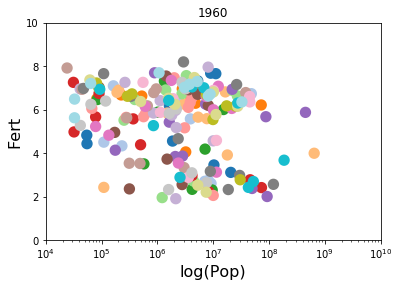

<Figure size 720x504 with 0 Axes>

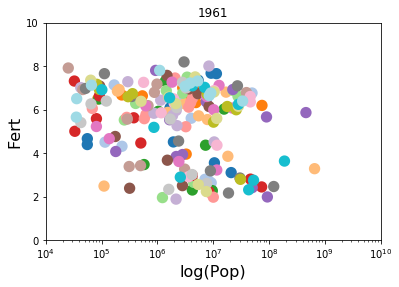

<Figure size 720x504 with 0 Axes>

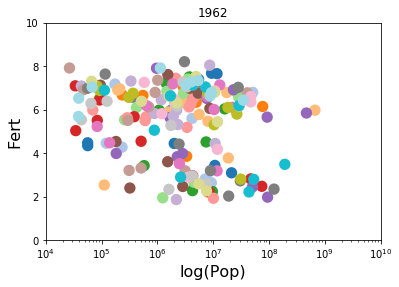

<Figure size 720x504 with 0 Axes>

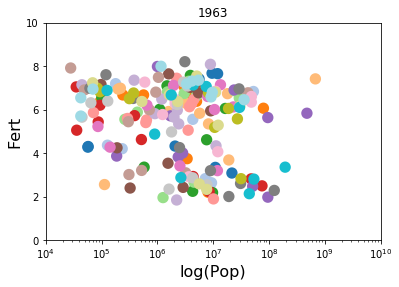

<Figure size 720x504 with 0 Axes>

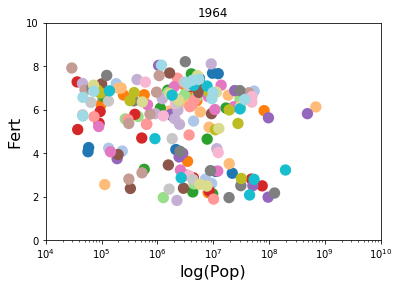

<Figure size 720x504 with 0 Axes>

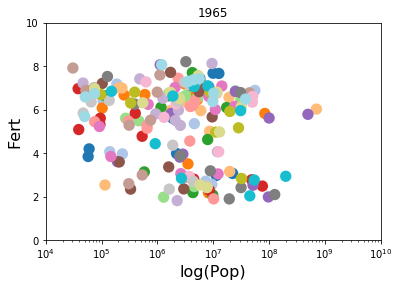

<Figure size 720x504 with 0 Axes>

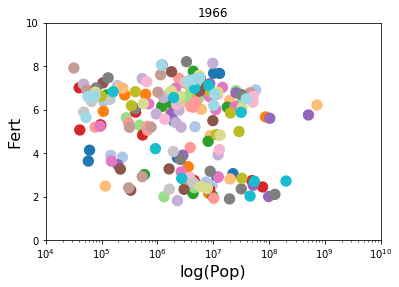

<Figure size 720x504 with 0 Axes>

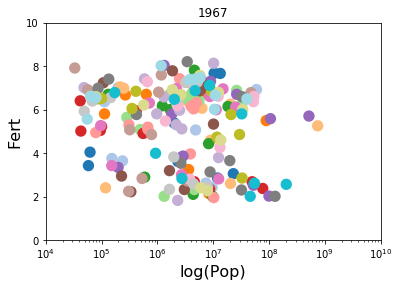

<Figure size 720x504 with 0 Axes>

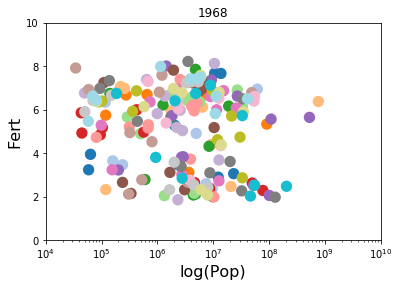

<Figure size 720x504 with 0 Axes>

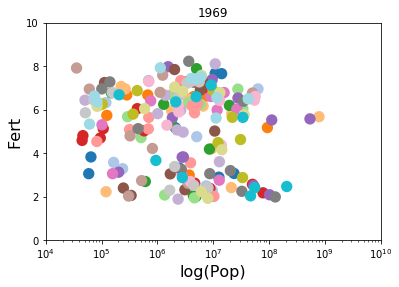

<Figure size 720x504 with 0 Axes>

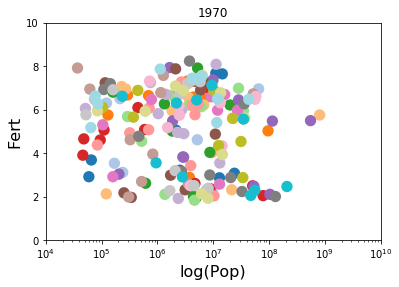

<Figure size 720x504 with 0 Axes>

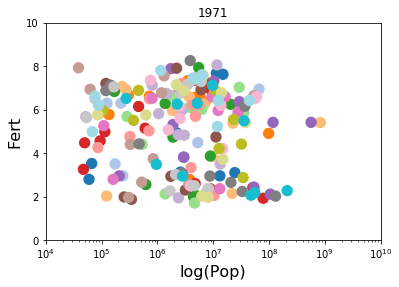

<Figure size 720x504 with 0 Axes>

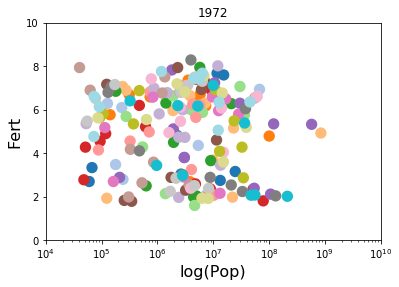

<Figure size 720x504 with 0 Axes>

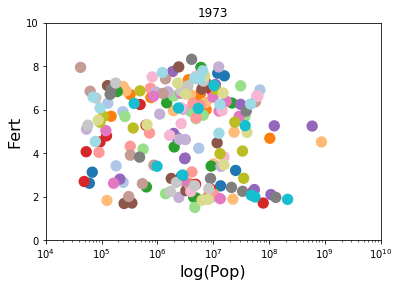

<Figure size 720x504 with 0 Axes>

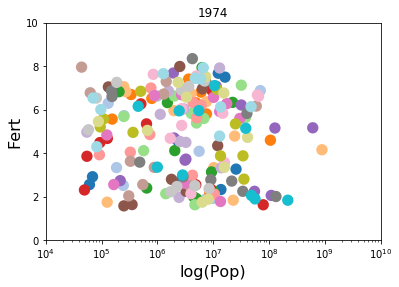

<Figure size 720x504 with 0 Axes>

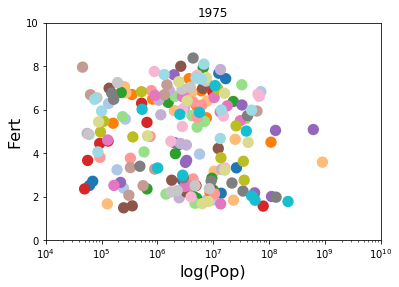

<Figure size 720x504 with 0 Axes>

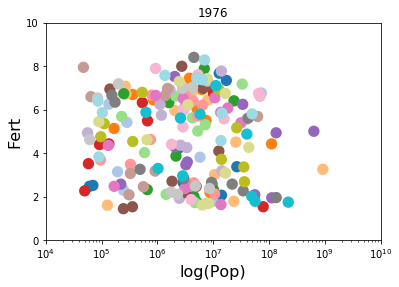

<Figure size 720x504 with 0 Axes>

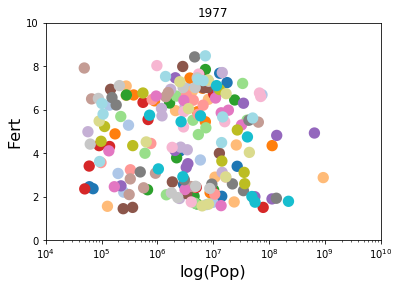

<Figure size 720x504 with 0 Axes>

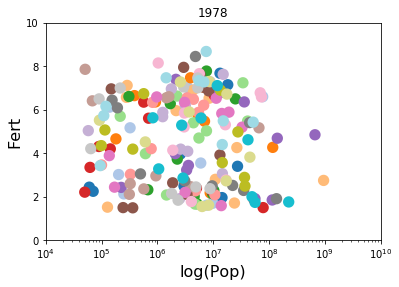

<Figure size 720x504 with 0 Axes>

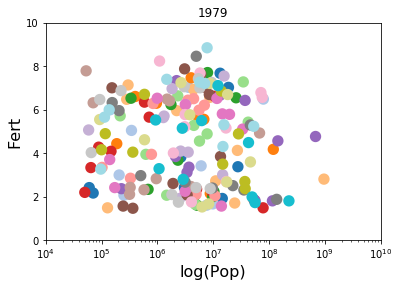

<Figure size 720x504 with 0 Axes>

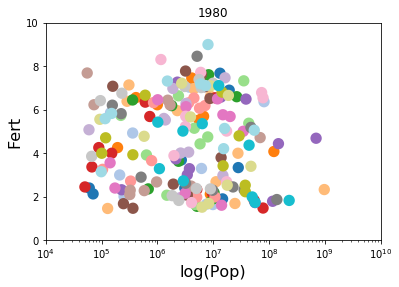

<Figure size 720x504 with 0 Axes>

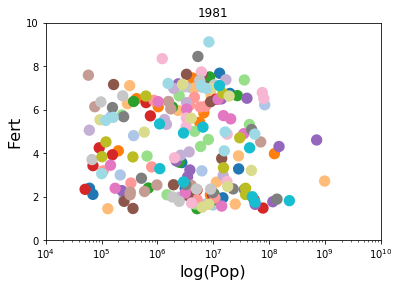

<Figure size 720x504 with 0 Axes>

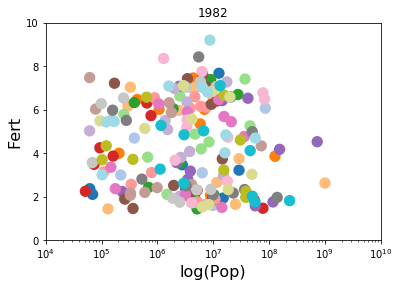

<Figure size 720x504 with 0 Axes>

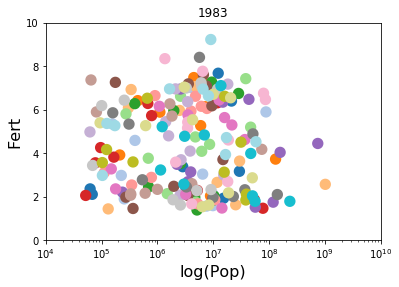

<Figure size 720x504 with 0 Axes>

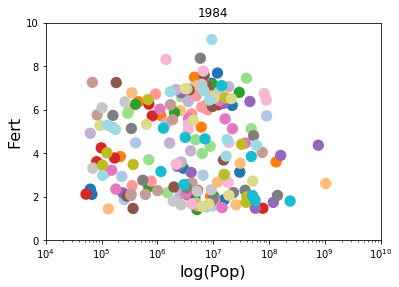

<Figure size 720x504 with 0 Axes>

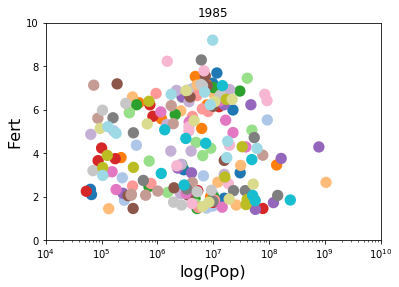

<Figure size 720x504 with 0 Axes>

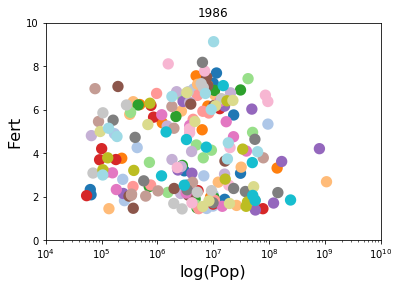

<Figure size 720x504 with 0 Axes>

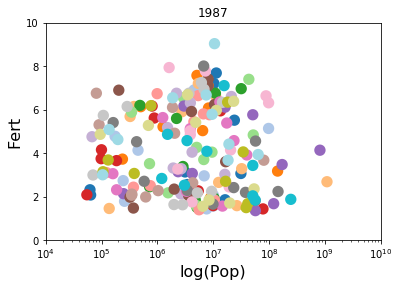

<Figure size 720x504 with 0 Axes>

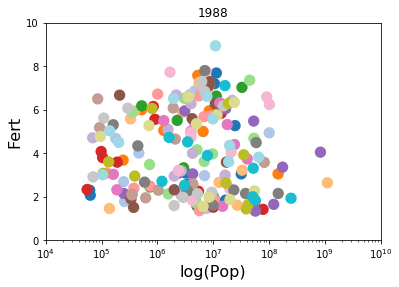

<Figure size 720x504 with 0 Axes>

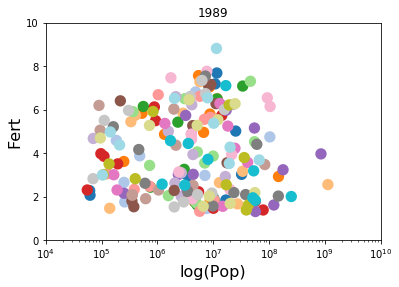

<Figure size 720x504 with 0 Axes>

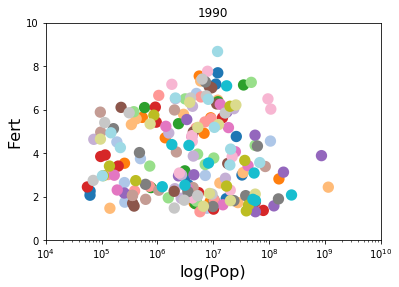

<Figure size 720x504 with 0 Axes>

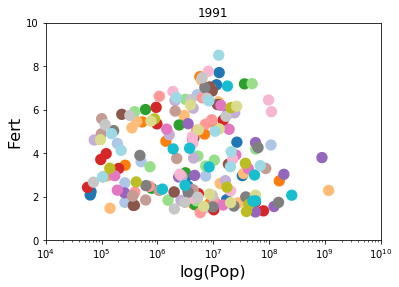

<Figure size 720x504 with 0 Axes>

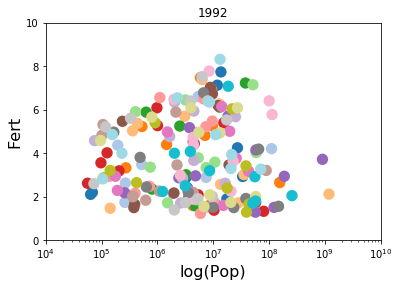

<Figure size 720x504 with 0 Axes>

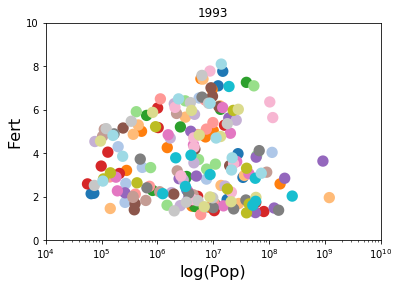

<Figure size 720x504 with 0 Axes>

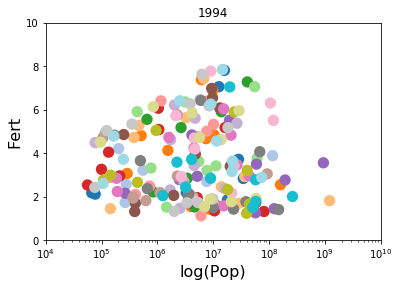

<Figure size 720x504 with 0 Axes>

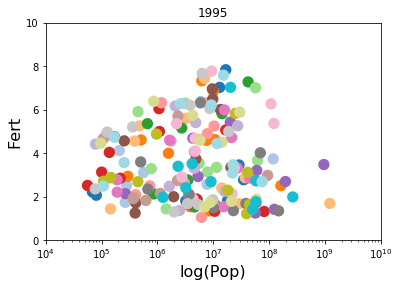

<Figure size 720x504 with 0 Axes>

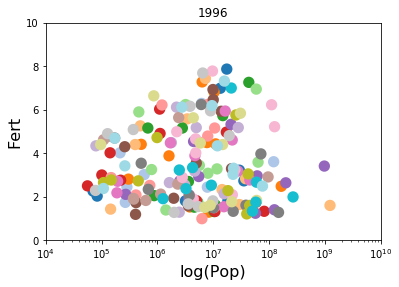

<Figure size 720x504 with 0 Axes>

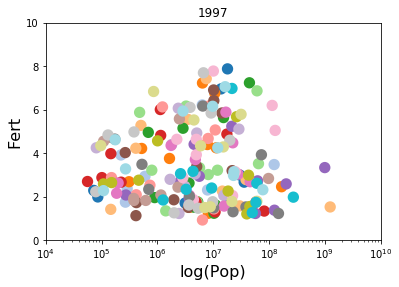

<Figure size 720x504 with 0 Axes>

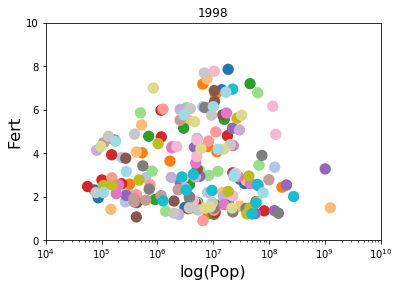

<Figure size 720x504 with 0 Axes>

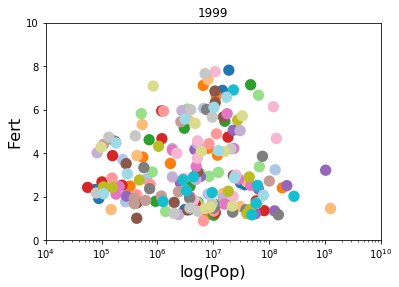

<Figure size 720x504 with 0 Axes>

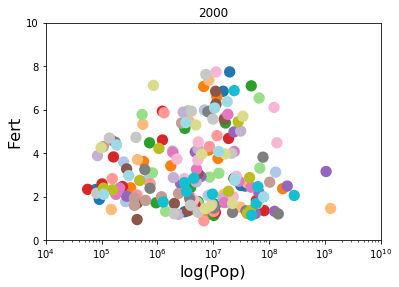

<Figure size 720x504 with 0 Axes>

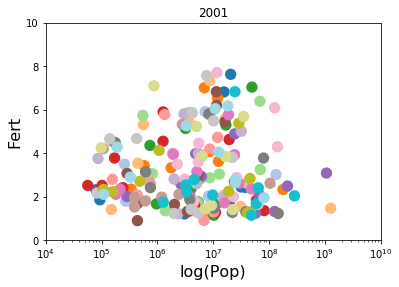

<Figure size 720x504 with 0 Axes>

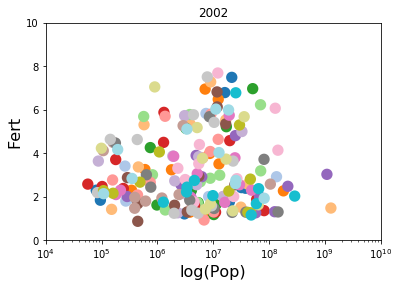

<Figure size 720x504 with 0 Axes>

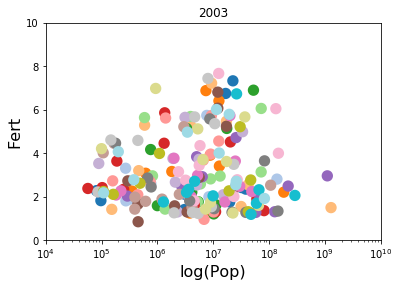

<Figure size 720x504 with 0 Axes>

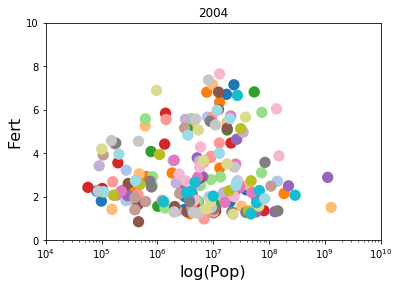

<Figure size 720x504 with 0 Axes>

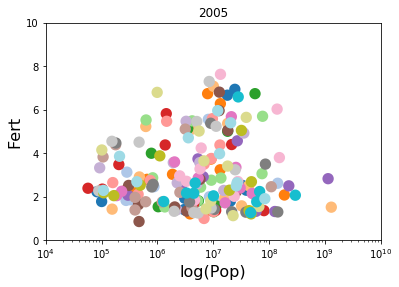

<Figure size 720x504 with 0 Axes>

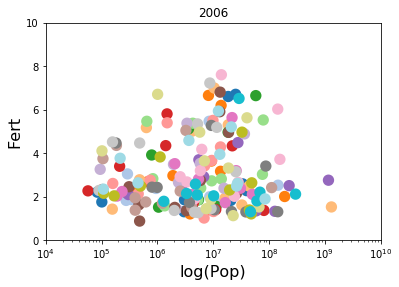

<Figure size 720x504 with 0 Axes>

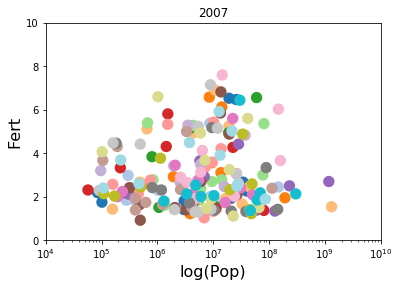

<Figure size 720x504 with 0 Axes>

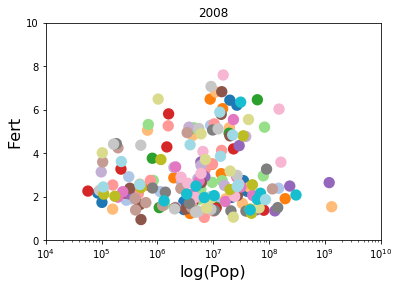

<Figure size 720x504 with 0 Axes>

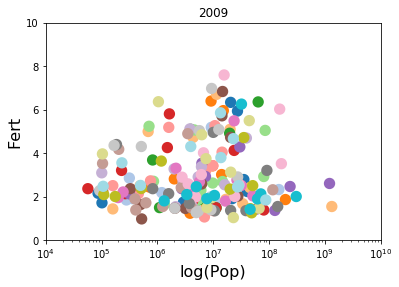

<Figure size 720x504 with 0 Axes>

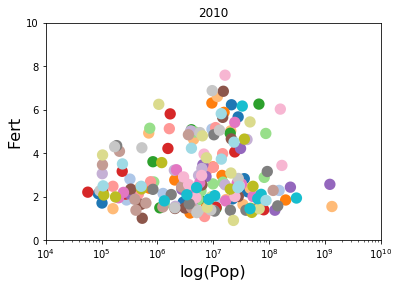

<Figure size 720x504 with 0 Axes>

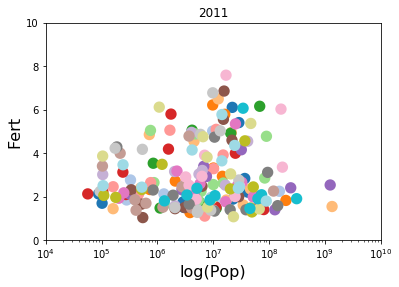

<Figure size 720x504 with 0 Axes>

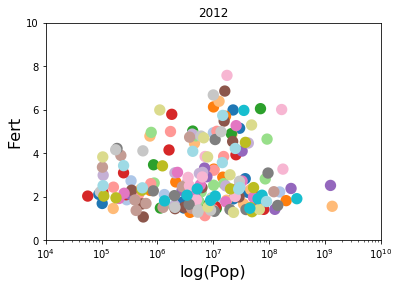

<Figure size 720x504 with 0 Axes>

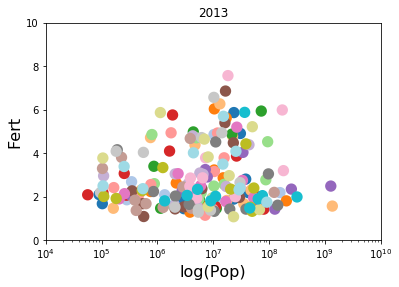

<Figure size 720x504 with 0 Axes>

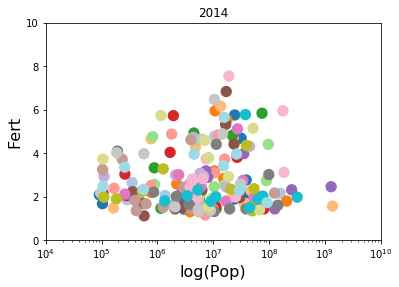

<Figure size 720x504 with 0 Axes>

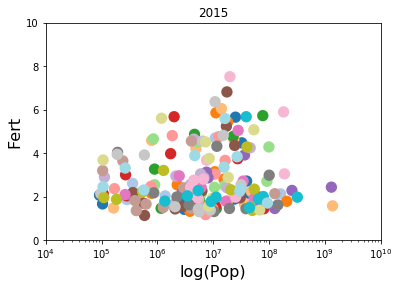

In [217]:
for year in year_array:
    plt.figure(figsize=(10,7))
    df6 = df3.unstack(1)
    df6 = df6[year]
    df6 = df6.unstack(1)
    cmap = plt.get_cmap('tab20', lut = len(df6)).colors
    df6.plot.scatter('Population', 'fertility', s=40, c=cmap, linewidths = 5)
    plt.title(year)
    plt.xscale(value = "log")
    plt.xlabel('log(Pop)', fontsize = '16')
    plt.ylabel('Fert', fontsize = '16')
    plt.axis(ymin = 0, ymax= 10, xmin = 1e4, xmax = 1e10)
    plt.savefig(f'./plots2/plot_{year}.png', bbox = 'tight')

In [218]:
list_of_images = []
for year in year_array:
    im = imageio.imread(f'./plots2/plot_{year}.png')
    list_of_images.append(im)

In [219]:
imageio.mimsave('./plots2/Pop_vs_fert.gif', list_of_images, fps = 3)